<a href="https://colab.research.google.com/github/maheravi/Deep-Learning/blob/main/Recurrent%20Neural%20Network/GRU_RNN_Comparison_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

In [2]:
N = 1500
t = np.arange(0,N)

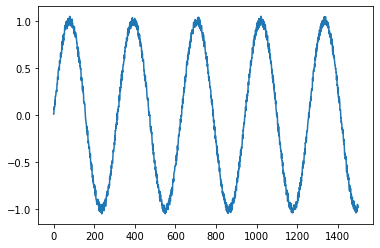

In [3]:
data_sin = np.sin(0.02 * t) + np.random.uniform(-0.05, 0.05, N)
plt.plot(data_sin)

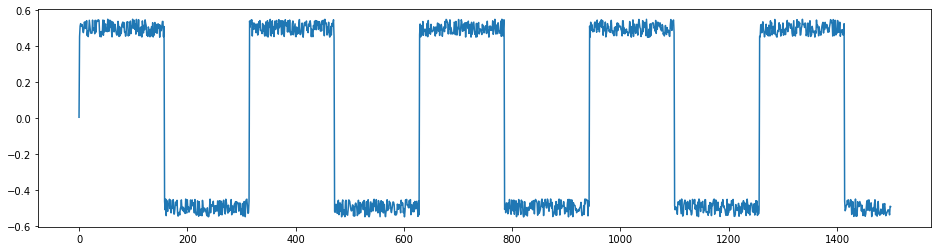

In [4]:
data_square = np.sign(np.sin(0.02 * t))/2 + np.random.uniform(-0.05, 0.05, N)
plt.figure(figsize=(16, 4))
plt.plot(data_square)
plt.show()

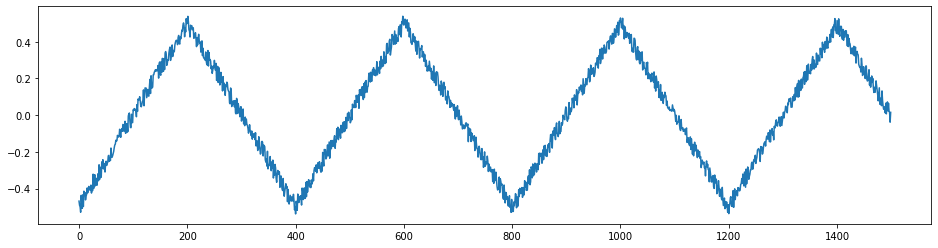

In [5]:
P = 200
A = 2
data_triangle = ((A/P) * (P - np.abs(t % (2*P) - P)) - 1) / 2 + np.random.uniform(-0.05, 0.05, N)
plt.figure(figsize=(16, 4))
plt.plot(data_triangle)
plt.show()

In [6]:
def ConvertSignalToDataset(signal, step, label):
  X = []
  y = []
  for i in range(len(signal)-step):
    j = i + step
    X.append(signal[i:j])
    y.append(label)

  return np.array(X), np.array(y)

In [7]:
X_sin, y_sine = ConvertSignalToDataset(data_sin, 40, 0)
X_square, y_square = ConvertSignalToDataset(data_square, 40, 1)
X_triangle, y_triangle = ConvertSignalToDataset(data_triangle, 40, 2)


In [8]:
X_sin.shape

(1460, 40)

In [9]:
X = np.concatenate((X_sin, X_square, X_triangle))
y = np.concatenate((y_sine, y_square, y_triangle))

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [11]:
X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]

In [20]:
modelRNN = tf.keras.models.Sequential([
        layers.SimpleRNN(units=64, input_shape=(None, 1)),
        layers.Dense(3, activation='softmax')
])

In [21]:
modelRNN.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

In [22]:
historyRNN = modelRNN.fit(X_train, y_train, epochs=20, batch_size=16)

Epoch 1/20
219/219 [==============================] - 4s 17ms/step - loss: 0.8343 - accuracy: 0.6156
Epoch 2/20
219/219 [==============================] - 4s 17ms/step - loss: 0.4799 - accuracy: 0.8154
Epoch 3/20
219/219 [==============================] - 4s 18ms/step - loss: 0.3453 - accuracy: 0.8764
Epoch 4/20
219/219 [==============================] - 4s 17ms/step - loss: 0.2505 - accuracy: 0.9187
Epoch 5/20
219/219 [==============================] - 4s 17ms/step - loss: 0.2354 - accuracy: 0.9278
Epoch 6/20
219/219 [==============================] - 4s 18ms/step - loss: 0.1785 - accuracy: 0.9424
Epoch 7/20
219/219 [==============================] - 4s 17ms/step - loss: 0.1995 - accuracy: 0.9338
Epoch 8/20
219/219 [==============================] - 4s 17ms/step - loss: 0.2109 - accuracy: 0.9332
Epoch 9/20
219/219 [==============================] - 4s 18ms/step - loss: 0.1506 - accuracy: 0.9512
Epoch 10/20
219/219 [==============================] - 4s 17ms/step - loss: 0.3637 - accura

In [23]:
modelRNN.evaluate(X_test, y_test)

28/28 [==============================] - 0s 5ms/step - loss: 0.1301 - accuracy: 0.9555


[0.13006345927715302, 0.9554794430732727]

In [24]:
modelGRU = tf.keras.models.Sequential([
        layers.GRU(units=64, input_shape=(None, 1)),
        layers.Dense(3, activation='softmax')
])

In [25]:
modelGRU.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

In [26]:
historyGRU = modelGRU.fit(X_train, y_train, epochs=20, batch_size=16)

Epoch 1/20
219/219 [==============================] - 2s 4ms/step - loss: 0.9702 - accuracy: 0.4969
Epoch 2/20
219/219 [==============================] - 1s 4ms/step - loss: 0.6785 - accuracy: 0.7560
Epoch 3/20
219/219 [==============================] - 1s 4ms/step - loss: 0.7205 - accuracy: 0.6983
Epoch 4/20
219/219 [==============================] - 1s 4ms/step - loss: 0.5146 - accuracy: 0.8068
Epoch 5/20
219/219 [==============================] - 1s 4ms/step - loss: 0.4167 - accuracy: 0.8499
Epoch 6/20
219/219 [==============================] - 1s 4ms/step - loss: 0.3534 - accuracy: 0.8707
Epoch 7/20
219/219 [==============================] - 1s 4ms/step - loss: 0.2728 - accuracy: 0.8995
Epoch 8/20
219/219 [==============================] - 1s 4ms/step - loss: 0.6365 - accuracy: 0.7577
Epoch 9/20
219/219 [==============================] - 1s 4ms/step - loss: 0.3599 - accuracy: 0.8861
Epoch 10/20
219/219 [==============================] - 1s 4ms/step - loss: 0.2844 - accuracy: 0.8964

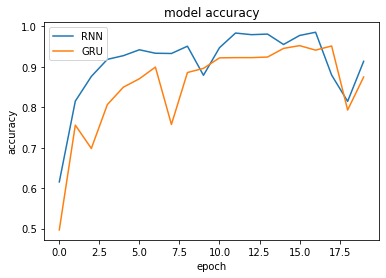

In [27]:
plt.plot(historyRNN.history['accuracy'])
plt.plot(historyGRU.history['accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['RNN','GRU'], loc='upper left')
plt.show()

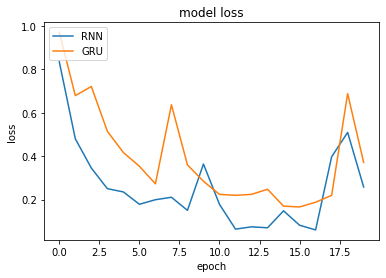

In [28]:
plt.plot(historyRNN.history['loss'])
plt.plot(historyGRU.history['loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['RNN','GRU'], loc='upper left')
plt.show()